<a href="https://colab.research.google.com/github/samuelphilips/Prediction-of-COVID-19-diagnosis/blob/main/Prediction_of_COVID_19_diagnosis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Prediction of COVID-19 diagnosis**

**Aim**: The assignment aims to predict COVID-19 diagnosis based on
         symptoms and demographic data, utilizing data analysis and machine learning techniques.

**Process**: Used Python and MySQL for data analysis, EDA, feature
             engineering, and machine learning to predict COVID-19 outcomes.

**Why** :    Project is for early COVID-19 detection, efficient
             healthcare



**Resource allocation,informed public health decisions and improving overall wellbeing**



**1-Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?**

**Ans** : Predicting diseases through machine learning, especially for COVID-19, is highly significant in the contemporary world. Timely identification of these diseases based on symptoms is vital for healthcare facilities to promptly isolate and treat patients, playing a crucial role in preventing the spread of the disease.



**2-How is it going to impact the medical field when it comes to effective screening and reducing health care burden.**

**Ans** : Our Medical facilities are using tests such as RAT(Rapid Antigen Test) to detect whether a person is covid affected, while our ML model uses patient's data to detect whether a particular patient is covid affected or not with accuracy, this will help to reduce the burden of testing and screening on health care fascilities.



**3-If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.**

**Ans** :A bad type of data or missing data can prove to be a problem for such models but if it works well for COVID-19, we might use a similar approach for other diseases in the future. It's like having a valuable tool for our medical facilities.

**Initial Hypothesis**


*   Prediction Hypothesis: We can predict COVID-19 by looking at symptoms and some personal info.

*   Benefits of Accurate Prediction: Accurate prediction can speed up treatment, resource use and disease management, reducing the strain on healthcare.
*   Common Symptoms Hypothesis: COVID-19 often causes coughing, fever, and breathing problems.



*   Uncommon Symptoms Hypothesis: People without COVID-19 are less likely to have a sore throat or a headache.
*   Symptoms in Specific Groups: Men with COVID-19 who've been in contact with people from other countries might have more coughing and fever.

*   Age and Severity Hypothesis: Those 60 and older might have more severe symptoms, especially trouble breathing.


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Warning is used to supress the display of warnings
import warnings
warnings.filterwarnings("ignore")

# Libraries used for Encoding:
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV #Hyperparameter Tuning

In [ ]:
data=pd.read_csv("/content/corona_tested_006.csv")

In [ ]:
covid_data = data.copy() #copy data into a new variable, covid_data.

**Exploratory Data Analysis - EDA**

In [ ]:
covid_data.shape

(171759, 11)

In [ ]:
covid_data.size

1889349

In [ ]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171759 entries, 0 to 171758
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               171759 non-null  int64 
 1   Test_date            171759 non-null  object
 2   Cough_symptoms       171759 non-null  object
 3   Fever                171759 non-null  object
 4   Sore_throat          171759 non-null  object
 5   Shortness_of_breath  171759 non-null  object
 6   Headache             171759 non-null  object
 7   Corona               171758 non-null  object
 8   Age_60_above         171758 non-null  object
 9   Sex                  171758 non-null  object
 10  Known_contact        171758 non-null  object
dtypes: int64(1), object(10)
memory usage: 14.4+ MB


In [ ]:
for column in covid_data:
  unique_value=covid_data[column].unique()
  print(f"unique Value in {column}:",unique_value) # Checking Unique values in each column

unique Value in Ind_ID: [     1      2      3 ... 171757 171758 171759]
unique Value in Test_date: ['11-03-2020' '12-03-2020' '13-03-2020' '14-03-2020' '15-03-2020'
 '16-03-2020' '17-03-2020' '18-03-2020' '19-03-2020' '20-03-2020'
 '21-03-2020' '22-03-2020' '23-03-2020' '24-03-2020' '25-03-2020'
 '26-03-2020' '27-03-2020' '28-03-2020' '29-03-2020' '30-03-2020'
 '31-03-2020' '01-04-2020' '02-04-2020' '03-04-2020' '04-04-2020'
 '05-04-2020' '06-04-2020' '07-04-2020' '08-04-2020' '09-04-2020'
 '10-04-2020' '11-04-2020' '12-04-2020' '13-04-2020' '14-04-2020'
 '15-04-2020' '16-04-2020']
unique Value in Cough_symptoms: ['TRUE' 'FALSE' 'None' False True]
unique Value in Fever: ['FALSE' 'TRUE' 'None' False True]
unique Value in Sore_throat: ['TRUE' 'FALSE' 'None' False True]
unique Value in Shortness_of_breath: ['FALSE' 'TRUE' 'None' False True]
unique Value in Headache: ['FALSE' 'TRUE' 'None' False True 'FA']
unique Value in Corona: ['negative' 'positive' 'other' nan]
unique Value in Age_60_a

In [ ]:
columns_to_replace = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']
# Replace boolean values and 'None' with appropriate strings and NaN
covid_data[columns_to_replace] = covid_data[columns_to_replace].replace({True: 'TRUE',False: 'FALSE','None': np.nan})


In [ ]:

#Date_Time Formatting

covid_data['Test_date'] = pd.to_datetime(covid_data['Test_date'], format='%d-%m-%Y')

**Data Cleaning**

In [ ]:

for column in covid_data:
  unique_value=covid_data[column].unique()
  print(f"unique Value in {column}:",unique_value) # Checking Unique values in each column

unique Value in Ind_ID: [     1      2      3 ... 171757 171758 171759]
unique Value in Test_date: ['2020-03-11T00:00:00.000000000' '2020-03-12T00:00:00.000000000'
 '2020-03-13T00:00:00.000000000' '2020-03-14T00:00:00.000000000'
 '2020-03-15T00:00:00.000000000' '2020-03-16T00:00:00.000000000'
 '2020-03-17T00:00:00.000000000' '2020-03-18T00:00:00.000000000'
 '2020-03-19T00:00:00.000000000' '2020-03-20T00:00:00.000000000'
 '2020-03-21T00:00:00.000000000' '2020-03-22T00:00:00.000000000'
 '2020-03-23T00:00:00.000000000' '2020-03-24T00:00:00.000000000'
 '2020-03-25T00:00:00.000000000' '2020-03-26T00:00:00.000000000'
 '2020-03-27T00:00:00.000000000' '2020-03-28T00:00:00.000000000'
 '2020-03-29T00:00:00.000000000' '2020-03-30T00:00:00.000000000'
 '2020-03-31T00:00:00.000000000' '2020-04-01T00:00:00.000000000'
 '2020-04-02T00:00:00.000000000' '2020-04-03T00:00:00.000000000'
 '2020-04-04T00:00:00.000000000' '2020-04-05T00:00:00.000000000'
 '2020-04-06T00:00:00.000000000' '2020-04-07T00:00:00.00

In [ ]:
columns_to_replace = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']
# Replace boolean values and 'None' with appropriate strings and NaN


In [ ]:

#Count null values in each column of covid_data
covid_data.isnull().sum()

Ind_ID                   0
Test_date                0
Cough_symptoms         252
Fever                  252
Sore_throat              1
Shortness_of_breath      1
Headache                 1
Corona                   1
Age_60_above             1
Sex                      1
Known_contact            1
dtype: int64

In [ ]:
covid_data.dropna(inplace=True) #Dropping all the null values

In [ ]:
#Count null values in each column of covid_data after Drop null values
covid_data.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [ ]:

covid_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,2020-03-11,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,2020-03-11,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,2020-03-11,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


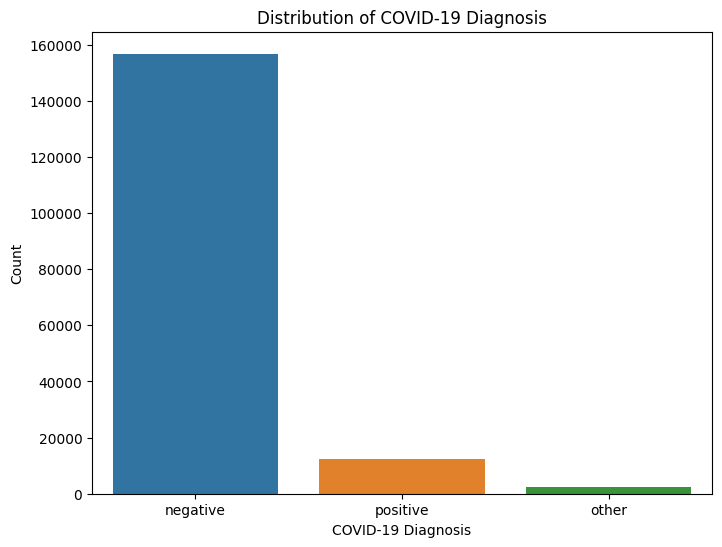

In [ ]:

covid_data[columns_to_replace] = covid_data[columns_to_replace].replace({True: 'TRUE',False: 'FALSE','None': np.nan})
# Visualize the data to identify patterns and correlations

plt.figure(figsize=(8, 6))
sns.countplot(x='Corona', data=covid_data)
plt.title('Distribution of COVID-19 Diagnosis')
plt.xlabel('COVID-19 Diagnosis')
plt.ylabel('Count')
plt.show()

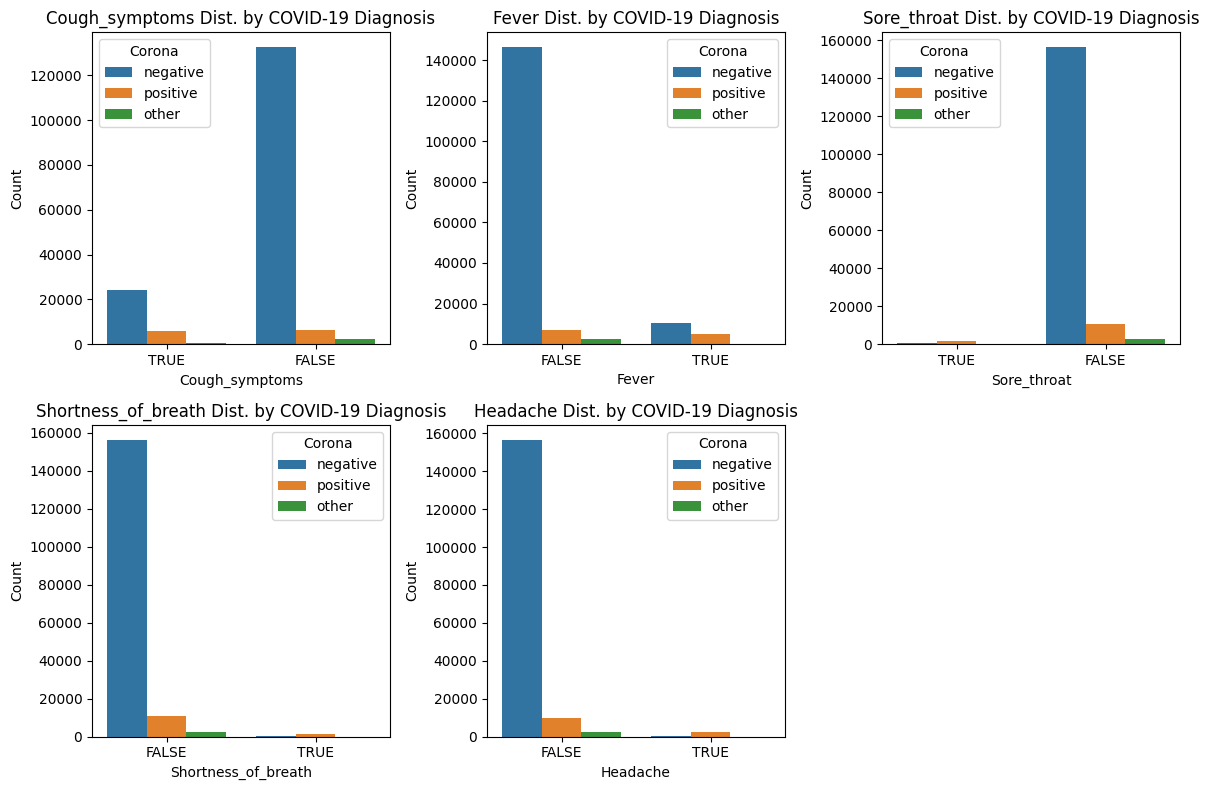

In [ ]:

#Symptoms Distribution Visualization
symptoms = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

plt.figure(figsize=(12, 8))
for i, symptom in enumerate(symptoms):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=symptom, data=covid_data, hue='Corona')
    plt.title(f'{symptom} Dist. by COVID-19 Diagnosis')
    plt.xlabel(symptom)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


In [ ]:

#Data Splitting:
df_train_val = covid_data.query("Test_date <= '2020-04-15' and Test_date >= '2020-03-11'")
df_test = covid_data.query("Test_date > '2020-04-15'")


**Train & Validation Data After Splitting**

In [ ]:

df_train_val.tail(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163184,163185,2020-04-15,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other
163185,163186,2020-04-15,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other
163186,163187,2020-04-15,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other
163187,163188,2020-04-15,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other
163188,163189,2020-04-15,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other


In [ ]:

df_test.head(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163189,163190,2020-04-16,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Abroad
163190,163191,2020-04-16,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Other
163191,163192,2020-04-16,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,female,Abroad
163192,163193,2020-04-16,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other
163193,163194,2020-04-16,FALSE,FALSE,FALSE,FALSE,FALSE,negative,None,male,Other


**Deleting unnecessary columns**

In [ ]:

#Drop unnecessary column in train & validation data
df_train_val = df_train_val.drop(columns=['Ind_ID','Test_date','Age_60_above','Sex'])
df_test = df_test.drop(columns=['Ind_ID','Test_date','Age_60_above','Sex'])

In [ ]:

df_train_val.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
0,TRUE,FALSE,TRUE,FALSE,FALSE,negative,Abroad
1,FALSE,TRUE,FALSE,FALSE,FALSE,positive,Abroad
2,FALSE,TRUE,FALSE,FALSE,FALSE,positive,Abroad
3,TRUE,FALSE,FALSE,FALSE,FALSE,negative,Abroad
4,TRUE,FALSE,FALSE,FALSE,FALSE,negative,Contact with confirmed


In [ ]:

df_test.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Known_contact
163189,TRUE,FALSE,FALSE,FALSE,FALSE,negative,Abroad
163190,FALSE,FALSE,FALSE,FALSE,FALSE,negative,Other
163191,TRUE,FALSE,FALSE,FALSE,FALSE,negative,Abroad
163192,FALSE,FALSE,FALSE,FALSE,FALSE,negative,Other
163193,FALSE,FALSE,FALSE,FALSE,FALSE,negative,Other


**Encoding**


**Encoding For Test Data**

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.2 MB/s eta 0:00:00


In [ ]:
#Binary encoding for symptoms column in train & val data
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache'])
encoded_train_val_1 = encoder.fit_transform(df_train_val)


In [ ]:
#get dummies encoding for known contact column in train & val data
encoded_train_val = pd.get_dummies(encoded_train_val_1, columns=['Known_contact'],drop_first=True)

In [ ]:

#label encoding for targer variable corona in train & val data
encoder = LabelEncoder()
encoded_train_val['Corona'] = encoder.fit_transform(encoded_train_val['Corona'])

In [ ]:
encoded_train_val.head()

,Cough_symptoms_0,Cough_symptoms_1,Fever_0,Fever_1,Sore_throat_0,Sore_throat_1,Shortness_of_breath_0,Shortness_of_breath_1,Headache_0,Headache_1,Corona,Known_contact_Contact with confirmed,Known_contact_Other
0,0,1,0,1,0,1,0,1,0,1,0,0,0
1,1,0,1,0,1,0,0,1,0,1,2,0,0
2,1,0,1,0,1,0,0,1,0,1,2,0,0
3,0,1,0,1,1,0,0,1,0,1,0,0,0
4,0,1,0,1,1,0,0,1,0,1,0,1,0


In [ ]:
# checking the unique values after encoding
for column in encoded_train_val:
  unique_value=encoded_train_val[column].unique()
  print(f"unique Value in {column}:",unique_value)

unique Value in Cough_symptoms_0: [0 1]
unique Value in Cough_symptoms_1: [1 0]
unique Value in Fever_0: [0 1]
unique Value in Fever_1: [1 0]
unique Value in Sore_throat_0: [0 1]
unique Value in Sore_throat_1: [1 0]
unique Value in Shortness_of_breath_0: [0 1]
unique Value in Shortness_of_breath_1: [1 0]
unique Value in Headache_0: [0 1]
unique Value in Headache_1: [1 0]
unique Value in Corona: [0 2 1]
unique Value in Known_contact_Contact with confirmed: [0 1]
unique Value in Known_contact_Other: [0 1]


**Encoding For Test Data**

In [ ]:
#Binary encoding for symptoms column in test data
encoder = ce.BinaryEncoder(cols=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache'])
encoded_test_1 = encoder.fit_transform(df_test)

In [ ]:
#get dummies encoding for known contact column in test data
encoded_test = pd.get_dummies(encoded_test_1, columns=['Known_contact'],drop_first=True)

In [ ]:

#label encoding for targer variable corona in test data
encoder = LabelEncoder()
encoded_test['Corona'] = encoder.fit_transform(encoded_test['Corona'])


In [ ]:

encoded_test.head()


,Cough_symptoms_0,Cough_symptoms_1,Fever_0,Fever_1,Sore_throat_0,Sore_throat_1,Shortness_of_breath_0,Shortness_of_breath_1,Headache_0,Headache_1,Corona,Known_contact_Contact with confirmed,Known_contact_Other
163189,0,1,0,1,0,1,0,1,0,1,0,0,0
163190,1,0,0,1,0,1,0,1,0,1,0,0,1
163191,0,1,0,1,0,1,0,1,0,1,0,0,0
163192,1,0,0,1,0,1,0,1,0,1,0,0,1
163193,1,0,0,1,0,1,0,1,0,1,0,0,1


In [ ]:

# checking the unique values after encoding
for column in encoded_test:
  unique_value=encoded_test[column].unique()
  print(f"unique Value in {column}:",unique_value)

unique Value in Cough_symptoms_0: [0 1]
unique Value in Cough_symptoms_1: [1 0]
unique Value in Fever_0: [0 1]
unique Value in Fever_1: [1 0]
unique Value in Sore_throat_0: [0 1]
unique Value in Sore_throat_1: [1 0]
unique Value in Shortness_of_breath_0: [0 1]
unique Value in Shortness_of_breath_1: [1 0]
unique Value in Headache_0: [0 1]
unique Value in Headache_1: [1 0]
unique Value in Corona: [0 1 2]
unique Value in Known_contact_Contact with confirmed: [0 1]
unique Value in Known_contact_Other: [0 1]


**Feature Selection - Using Chi-Square Test**

In [ ]:

#Libraries required for Chi2 test
from sklearn import datasets
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from scipy.stats import chi2_contingency

In [ ]:

X = encoded_train_val.drop(['Corona'], axis = 1)
y = encoded_train_val['Corona']
selector = SelectKBest(score_func=chi2, k='all')
X_new = selector.fit_transform(X, y)
p_values = selector.pvalues_
p_values_df = pd.DataFrame({'Feature': X.columns, 'P-Values': p_values})
print(p_values_df)


                                 Feature       P-Values
0                       Cough_symptoms_0  2.833904e-305
1                       Cough_symptoms_1   0.000000e+00
2                                Fever_0   0.000000e+00
3                                Fever_1   0.000000e+00
4                          Sore_throat_0   1.856333e-38
5                          Sore_throat_1   0.000000e+00
6                  Shortness_of_breath_0   0.000000e+00
7                  Shortness_of_breath_1   3.009087e-22
8                             Headache_0   0.000000e+00
9                             Headache_1   1.076922e-83
10  Known_contact_Contact with confirmed   0.000000e+00
11                   Known_contact_Other   0.000000e+00


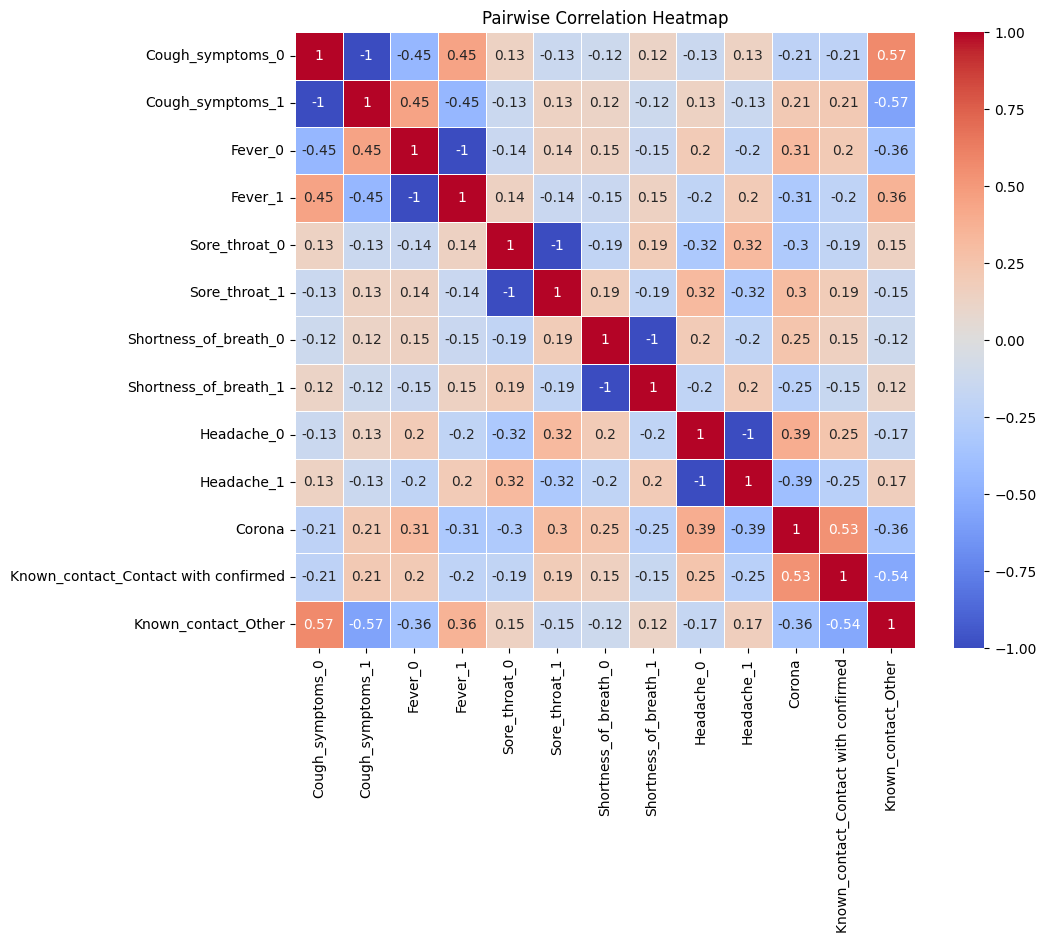

In [ ]:

#Pairwise correlation Heatmap
correlation_matrix = encoded_train_val.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Pairwise Correlation Heatmap')
plt.show()


**Selected Features**


The following are the features we'll use to predict our target variable (Covid19 Positive or Negative):

Cough_symptoms : ['TRUE','FALSE']

Fever : ['FALSE','TRUE']

Sore_throat : ['TRUE','FALSE']

Shortness_of_breath : ['FALSE','TRUE']

Headache : ['FALSE','TRUE']

Known_contact : ['Abroad','Contact with confirmed','Other']

Corona(Target Variable) : ['negative','positive','other']

**Data Splitting For Train & Test**

In [ ]:

from sklearn.model_selection import train_test_split

# Split the data into features (X) and target (y)
X = encoded_train_val.drop('Corona', axis=1)
y = encoded_train_val['Corona']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the split sets
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (130348, 12)
X_val shape: (32587, 12)
y_train shape: (130348,)
y_val shape: (32587,)


**Data Splitting For Train & Validation Data**

In [ ]:
from sklearn.model_selection import train_test_split

X = encoded_train_val.drop('Corona', axis=1)
y = encoded_train_val['Corona']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)

X_train shape: (130348, 12)
X_val shape: (32587, 12)
y_train shape: (130348,)
y_val shape: (32587,)


**"ML Algorithms"**


**"Logistic Regression Model"**

In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y_val, y_pred)*100,2)
print(f"Logistic Regression Accuracy Score For Validation Data : {accuracy}")

Logistic Regression Accuracy Score For Validation Data : 93.37


In [ ]:

X = encoded_test.drop('Corona', axis=1)
y = encoded_test['Corona']

# Make predictions on the test data
y_pred = model.predict(X)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y, y_pred)*100,2)
print(f"Logistic Regression Accuracy Score for Test Data : {accuracy}")

Logistic Regression Accuracy Score for Test Data : 91.5


**The accuracy we got using Logistic Regression on test data is 91.5%**

In [ ]:
# Define the hyperparameter grid to search for logistic regression
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga']}

grid_search_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

grid_search_lr.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params_lr = grid_search_lr.best_params_
best_model_lr = grid_search_lr.best_estimator_
print(best_params_lr)
print(best_model_lr)

In [ ]:
lr_mod_best = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
lr_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_lr = lr_mod_best.predict(X)
class_report_lr_best = classification_report(y, y_pred_best_lr)
print(f"Classification Report :\n {class_report_lr_best}")

Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.93      0.96      8279
           1       0.00      0.00      0.00        67
           2       0.19      0.63      0.29       223

    accuracy                           0.92      8569
   macro avg       0.39      0.52      0.42      8569
weighted avg       0.95      0.92      0.93      8569



In [ ]:
lrmodel_accuracy = round(accuracy_score(y, y_pred_best_lr)*100, 2)
print(f"Accuracy score after tuning : {lrmodel_accuracy}")

Accuracy score after tuning : 91.5


**With the Logistic Regression model, we achieved an accuracy of 91.5%. After hyperparameter tuning, we still achieved the same accuracy.**



**"Random Forest Model"**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create a RandomForestClassifier model
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y_val, y_pred)*100,2)
print(f"Random Forest Accuracy Score for Validation Data : {accuracy}")

Random Forest Accuracy Score for Validation Data : 94.11


In [ ]:
X = encoded_test.drop('Corona', axis=1)
y = encoded_test['Corona']

# Make predictions on the test data
y_pred = model.predict(X)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y, y_pred)*100,2)
print(f"Random Forest Accuracy Score for Test Data: {accuracy}")

Random Forest Accuracy Score for Test Data: 6.98


In [ ]:
# Define the hyperparameter grid to search for random forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

grid_search_rf = GridSearchCV(model, param_grid_rf, cv=5, scoring='f1', n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_rf = grid_search_rf.best_params_
best_model_rf = grid_search_rf.best_estimator_
print(best_params_rf)
print(best_model_rf)

In [ ]:
rf_mod_best = RandomForestClassifier(criterion = 'gini', max_depth= None, min_samples_leaf = 1, min_samples_split= 2, n_estimators= 50, random_state= 42)
rf_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_rf = rf_mod_best.predict(X)
class_report_rf_best = classification_report(y, y_pred_best_rf)
print(f"Classification Report :\n {class_report_rf_best}")

Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.05      0.09      8279
           1       0.00      0.00      0.00        67
           2       0.03      1.00      0.05       223

    accuracy                           0.07      8569
   macro avg       0.34      0.35      0.05      8569
weighted avg       0.96      0.07      0.09      8569



In [ ]:

rfmodel_accuracy = round(accuracy_score(y, y_pred_best_rf)*100, 2)
print(f"Accuracy score after tuning : {rfmodel_accuracy}")

Accuracy score after tuning : 6.98


**With the Random Forest model we can predict 5.41% accurately, after tuning the accuracy remains the same**




**"Decision Tree Model"**

In [ ]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree model
model = DecisionTreeClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(X_val)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y_val, y_pred)*100,2)
print(f"Decision Tree Accuracy Score for validation Data : {accuracy}")

Decision Tree Accuracy Score for validation Data : 94.11


In [ ]:

X = encoded_test.drop('Corona', axis=1)
y = encoded_test['Corona']

# Make predictions on the test data
y_pred = model.predict(X)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y, y_pred)*100,2)
print(f"Decision Tree Accuracy Score for Test Data : {accuracy}")

Decision Tree Accuracy Score for Test Data : 6.98


**The accuracy we got using Decision Tree model on test data is 6.98%**

In [ ]:
# Define the hyperparameter grid to search for decision tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']}

# Create the GridSearchCV object
grid_search_dt = GridSearchCV(model, param_grid_dt, cv=5, scoring='f1', n_jobs=-1)

grid_search_dt.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params_dt = grid_search_dt.best_params_
best_model_dt = grid_search_dt.best_estimator_
print(best_params_dt)
print(best_model_dt)

In [ ]:
dt_mod_best = DecisionTreeClassifier(criterion = 'gini', max_depth= None, min_samples_leaf = 1, min_samples_split = 2)
dt_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_dt = dt_mod_best.predict(X)
class_report_dt_best = classification_report(y, y_pred_best_dt)
print(f"Classification Report :\n {class_report_dt_best}")

Classification Report :
               precision    recall  f1-score   support

           0       0.99      0.05      0.09      8279
           1       0.00      0.00      0.00        67
           2       0.03      1.00      0.05       223

    accuracy                           0.07      8569
   macro avg       0.34      0.35      0.05      8569
weighted avg       0.96      0.07      0.09      8569



In [ ]:

dtmodel_accuracy = round(accuracy_score(y, y_pred_best_dt)*100, 2)
print(f"Accuracy score after tuning : {dtmodel_accuracy}")

Accuracy score after tuning : 6.98


**With the Decision Tree model we can predict 5.41% accurately, after tuning the accuracy remains the same.**

**"AdaBoost Model"**

In [ ]:

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the weak classifier
base_classifier = DecisionTreeClassifier(max_depth=1)

# Create an instance of the AdaBoostClassifier
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate=1.0)

# Fit the AdaBoost classifier to your training data
adaboost_classifier.fit(X_train, y_train)

# Make predictions using the trained classifier
y_pred = adaboost_classifier.predict(X_val)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y_val, y_pred)*100,2)
print(f"AdaBoost Accuracy Score for Validation Data: {accuracy}")

AdaBoost Accuracy Score for Validation Data: 92.92


In [ ]:
X = encoded_test.drop('Corona', axis=1)
y = encoded_test['Corona']

# Make predictions on the test data
y_pred = adaboost_classifier.predict(X)

# Calculate the accuracy of the model
accuracy = round(accuracy_score(y, y_pred)*100,2)
print(f"AdaBoost Accuracy Score for Test Data: {accuracy}")

AdaBoost Accuracy Score for Test Data: 92.31


In [ ]:
# Define the hyperparameter grid to search for Adaboost
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners (decision trees)
    'learning_rate': [0.01, 0.1, 0.5, 1.0],  # Learning rate
    'algorithm': ['SAMME', 'SAMME.R']  # AdaBoost algorithm variant
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=5)

# Fit the grid search to your data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params_ada = grid_search.best_params_
best_score_ada = grid_search.best_score_

print(best_params_ada)
print(best_score_ada)

In [ ]:
ada_mod_best = AdaBoostClassifier(algorithm= 'SAMME', learning_rate= 1.0, n_estimators= 50)
ada_mod_best.fit(X_train, y_train)
#Predict the response for test dataset
y_pred_best_ada = ada_mod_best.predict(X)
class_report_ada_best = classification_report(y, y_pred_best_ada)
print(f"Classification Report :\n {class_report_ada_best}")


Classification Report :
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      8279
           1       0.00      0.00      0.00        67
           2       0.30      0.53      0.38       223

    accuracy                           0.95      8569
   macro avg       0.43      0.50      0.45      8569
weighted avg       0.95      0.95      0.95      8569



In [ ]:
ada_model_accuracy = round(accuracy_score(y, y_pred_best_ada)*100, 2)
print(f"Accuracy score after tuning : {ada_model_accuracy}")

Accuracy score after tuning : 94.84


With **"ADAboost"** algorithm we can predict 92.31% accurately, after tuning we are getting 94.84% accuracy

In [ ]:
import plotly.graph_objs as go
import plotly.offline as pyo

models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'ADAboost']
accuracy_scores = [lrmodel_accuracy, dtmodel_accuracy, rfmodel_accuracy, ada_model_accuracy]

trace = go.Bar(
    x=models,
    y=accuracy_scores,
    text=[f'{score}%' for score in accuracy_scores],
    marker=dict(color='lightblue', line=dict(color='black', width=1.5)),
)

data = [trace]

layout = go.Layout(
    title='Comparison of Model Performance Metrics',
    xaxis=dict(title='Models'),
    yaxis=dict(title='Scores'),
)

fig = go.Figure(data=data, layout=layout)


pyo.iplot(fig)

#Model comparison DataFrame
accuracy_scores_with_percent = [f'{score}%' for score in accuracy_scores]
model_comparison_df = pd.DataFrame({'Model_Name': models, 'Accuracy Score': accuracy_scores_with_percent})
model_comparison_df = model_comparison_df.sort_values(by='Accuracy Score', ascending=False)
model_comparison_df.reset_index(drop=True, inplace=True)
print(model_comparison_df)

            Model_Name Accuracy Score
0             ADAboost         94.84%
1  Logistic Regression          91.5%
2        Decision Tree          6.98%
3        Random Forest          6.98%


From the above bar chart we can conclude that **"ADAboost"** algorithm is the best fit for our Covid19 detection model with an accuracy of 94.84%

**Conclusion**

The highest accuracy our model achieved is 94.84%

**What Next?**

A good next step would be to discuss with team , research on different options of going forward.

We can collect more data based on the most important features?

Can we try more models?

Could you improve the current models (beyond what we've done so far)?

here it is to remember, our biggest restriction will be time. Hence, it's paramount to minimise the time between experiments.

The more we try, the more we figure out what doesn't work, the more we'll start to get a hang of what works.